In [2]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [3]:
selected_genes_NHBE = dt.get_p_values('welch', dt.get_data_by_series(1), dt.get_columns('NHBE', 'healthy', series = (1,)), dt.get_columns('NHBE', 'sars-cov2', series = (1,)), limit = 0.05).index

data = dt.get_data('A549', 'healthy', 'sars-cov2', series = (2, 5))
columns_healthy = dt.get_columns('A549', 'healthy', series = (2, 5))
columns_sars_cov2 = dt.get_columns('A549', 'sars-cov2', series = (2, 5))

selected_genes_A549 = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2, limit = 0.05).index

data = dt.get_data('A549', 'healthy_ace2', 'sars-cov2_ace2')
columns_healthy = dt.get_columns('A549', 'healthy_ace2')
columns_sars_cov2 = dt.get_columns('A549', 'sars-cov2_ace2')

selected_genes_A549_ACE2 = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2, limit = 0.05).index

data = dt.get_data('Calu3', 'healthy', 'sars-cov2')
columns_healthy = dt.get_columns('Calu3', 'healthy')
columns_sars_cov2 = dt.get_columns('Calu3', 'sars-cov2')

selected_genes_Calu3 = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2, limit = 0.05).index

data = dt.get_data('biopsy', 'healthy', 'sars-cov2')
columns_healthy = dt.get_columns('biopsy', 'healthy')
columns_sars_cov2 = dt.get_columns('biopsy', 'sars-cov2')

selected_genes_Biopsy = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2, limit = 0.05).index

In [4]:
selected_genes_Biopsy

Index(['WASH7P', 'LOC100133331', 'LOC100288069', 'LINC00115', 'NOC2L',
       'KLHL17', 'C1orf159', 'TTLL10', 'TNFRSF18', 'SDF4',
       ...
       'RPS4Y1', 'ZFY', 'LINC00278', 'TBL1Y', 'PRKY', 'USP9Y', 'TMSB4Y',
       'BCORP1', 'TTTY10', 'RPS4Y2'],
      dtype='object', length=8626)

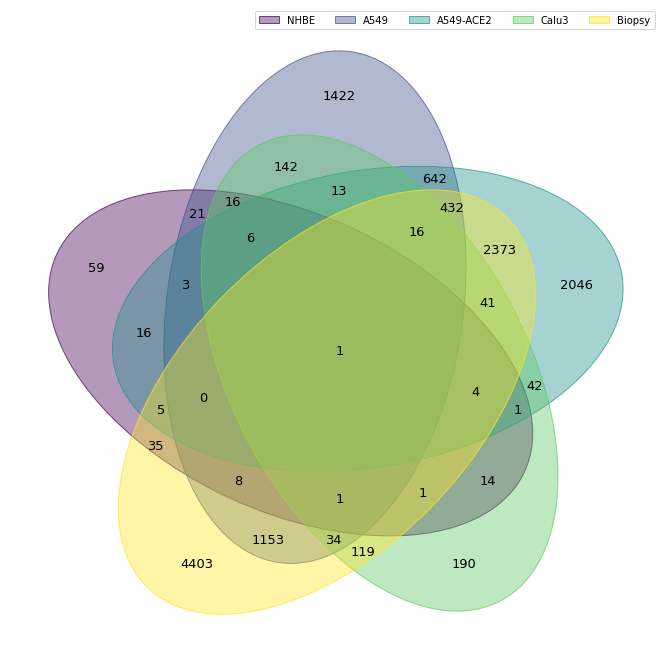

In [5]:
from venn import venn

labels = ["NHBE", "A549", "A549-ACE2", "Calu3", "Biopsy"]

sets = {
    "NHBE": set(selected_genes_NHBE),
    "A549": set(selected_genes_A549),
    "A549-ACE2": set(selected_genes_A549_ACE2),
    "Calu3": set(selected_genes_Calu3),
    "Biopsy": set(selected_genes_Biopsy)
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=6)

In [ ]:
import itertools

genes = np.unique(set(itertools.chain(sets['NHBE'], sets['A549'], sets['A549-ACE2'], sets['Calu3'], sets['Biopsy'])))

values = []

for g in genes[0]:
    values += [[g in sets['NHBE'], g in sets['A549'], g in sets['A549-ACE2'], g in sets['Calu3'], g in sets['Biopsy']]]


In [18]:
len(genes[0])

13259

In [19]:
len(sets['NHBE']) + len(sets['A549']) + len(sets['A549-ACE2']) + len(sets['Calu3']) + len(sets['Biopsy'])

19009

In [30]:
vennData = pd.DataFrame(values, genes[0], ['NHBE', 'A549', 'A549_ACE2', 'Calu3', 'Biopsy'])

In [31]:
vennData

,NHBE,A549,A549_ACE2,Calu3,Biopsy
SET,False,True,True,False,False
C1QL1,True,False,True,False,False
GAS2,False,False,False,True,True
CDC25C,False,False,False,False,True
ALDH7A1,False,False,True,False,False
...,...,...,...,...,...
VPS53,False,False,False,False,True
CYP2A13,False,True,False,False,False
TNFRSF1B,False,True,False,False,True
CDC45,False,False,True,False,False


In [1]:
vennData.query('NHBE == True & A549 == True & A549_ACE2 == True & Calu3 == True & Biopsy == True')

NameError: name 'vennData' is not defined